In [1]:
from lazylib import make, AlexNetEE, device, takeConfusionMatrix, takeRocCurve, now, register
import torch

/home/luizp/projects/pibit/pibit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = now()
n

'07-05-2024 01-09-13'

In [3]:
epocs = 100
model = make(
    EPOCHS=epocs,
    BATCH_SIZE=128,
    LEARNING_RATE=1e-3,
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/cicClean.csv", 
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=AlexNetEE(128, confidence_threshold=0.3).to(device()),
    SEED=1701,
    xcol=1
    ) 
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[07-05-2024 01-10-16] Epoch 001 Acc: 0.9563 Loss: 0.14558023: 100%|██████████| 782/782 [00:52<00:00, 14.95it/s]
[07-05-2024 01-15-48] Epoch 001 Val. Acc: 0.9968 Val. Loss: 0.01606731: 100%|██████████| 7032/7032 [05:30<00:00, 21.25it/s]
[07-05-2024 01-16-45] Epoch 002 Acc: 0.9964 Loss: 0.01596997: 100%|██████████| 782/782 [00:50<00:00, 15.38it/s]
[07-05-2024 01-18-52] Epoch 002 Val. Acc: 0.9974 Val. Loss: 0.01143605: 100%|██████████| 7032/7032 [02:05<00:00, 56.08it/s] 
[07-05-2024 01-19-17] Epoch 003 Acc: 0.9972 Loss: 0.01329088: 100%|██████████| 782/782 [00:17<00:00, 44.40it/s]
[07-05-2024 01-20-47] Epoch 003 Val. Acc: 0.9967 Val. Loss: 0.01271285: 100%|██████████| 7032/7032 [01:27<00:00, 80.27it/s]
[07-05-2024 01-21-17] Epoch 004 Acc: 0.9977 Loss: 0.01068598: 100%|██████████| 782/782 [00:17<00:00, 44.63it/s]
[07-05-2024 01-22-46] Epoch 004 Val. Acc: 0.9983 Val. Loss: 0.00934885: 100%|██████████| 7032/7032 [01:27<00:00, 80.28it/s]
[07-05-2024 01-23-16] Epoch 005 Acc: 0.9980 Loss: 0.009

Finished experiment!


In [4]:
def takeFromDisk(path:str):
    import pickle
    recovered_object = []
    for i in range(1, 101):
        with open(path, 'rb') as f:
            recovered_object.append(pickle.load(f))
    return recovered_object

In [6]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--100.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--100.txt')

In [25]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

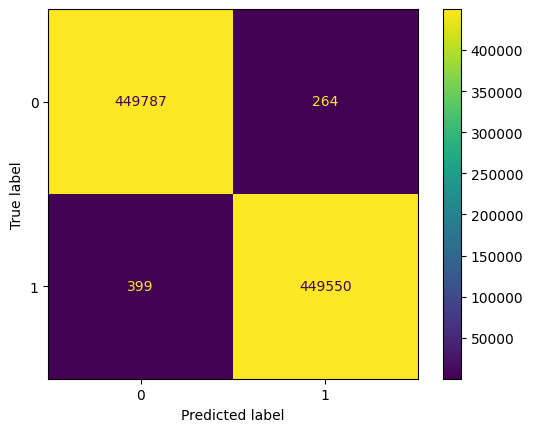

In [28]:
ConfusionMatrixDisplay(np.array(valid[0]['confusion_matrix'])).plot()

In [42]:
def takeConfusionMatrix(metrics: dict):
    cm = np.array(metrics[0]["confusion_matrix"])
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax)
    return

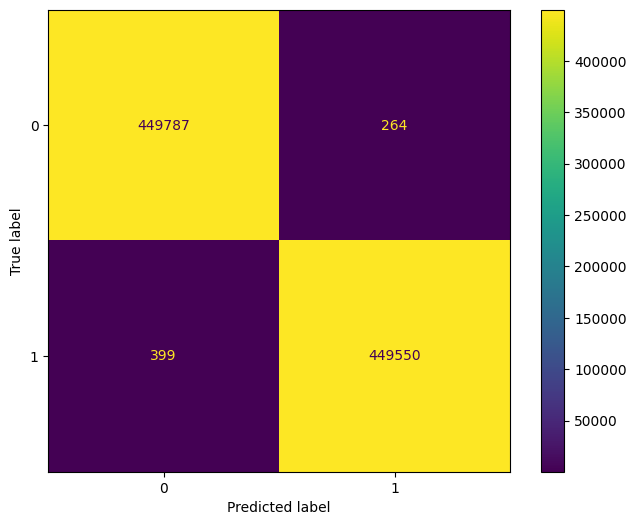

In [43]:
takeConfusionMatrix(valid)

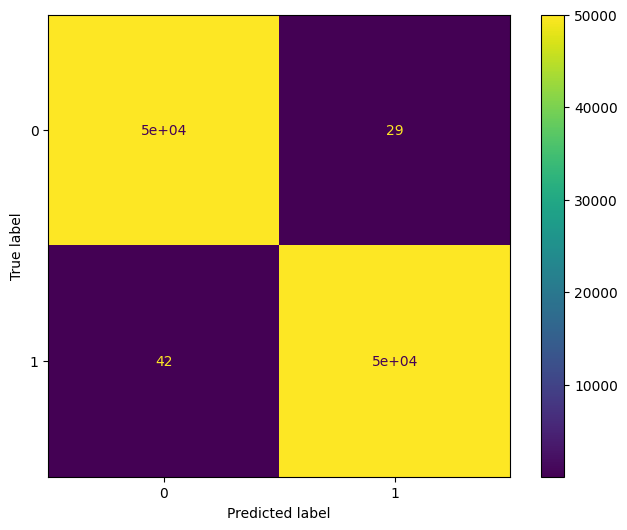

In [44]:
takeConfusionMatrix(train)

In [30]:
def takeRocCurve(metrics: list) -> plt:
    fpr, tpr, thresholds = metrics[0]["roc_curve"]
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.8f})')
    plt.plot([-0.01, 1.01], [-0.01, 1.01], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

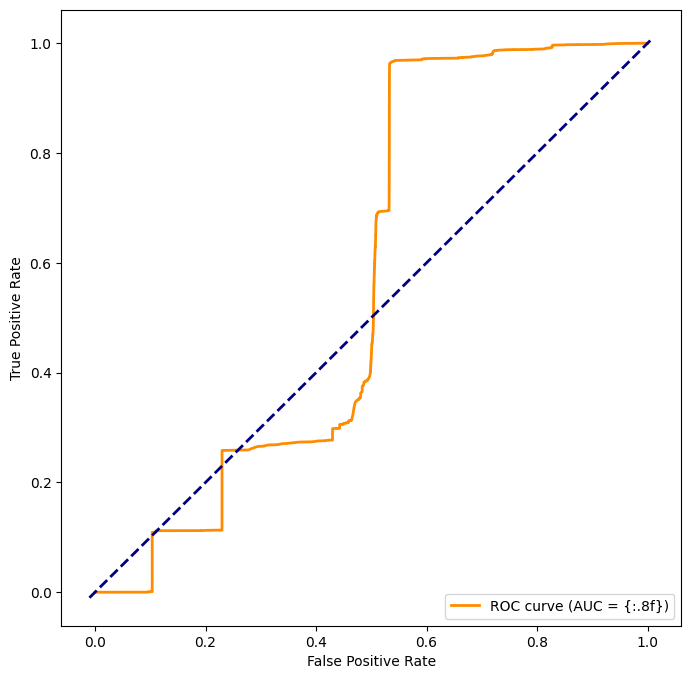

In [31]:
takeRocCurve(valid)

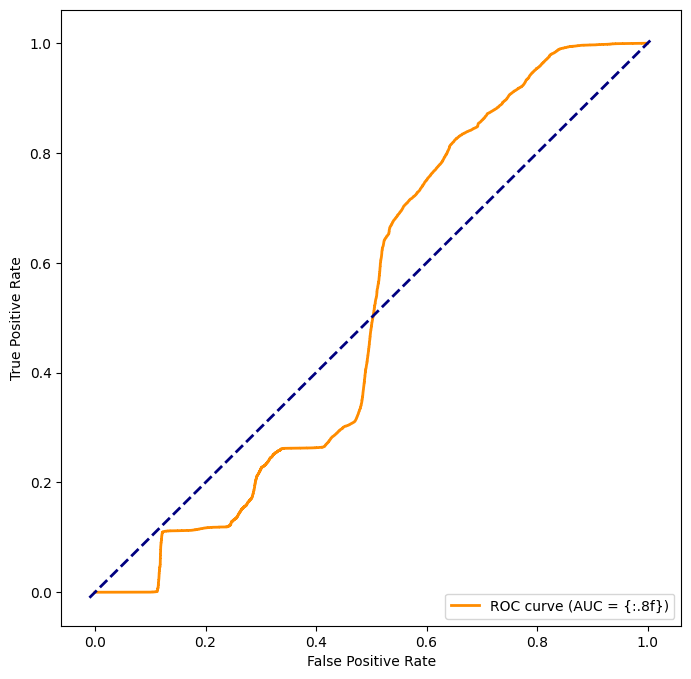

In [32]:
takeRocCurve(train)